In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape[0]

60000

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

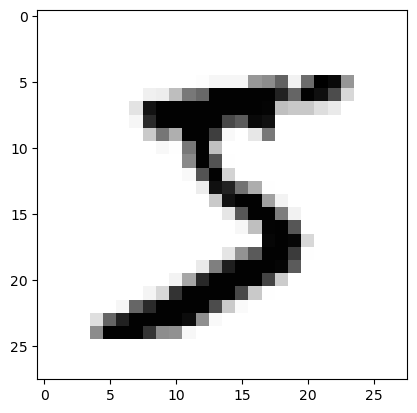

In [7]:
plt.imshow(X_train[0], cmap=('Greys'))

In [8]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_train = X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype(float) / 255

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=200, callbacks=[early_stopping])

Epoch 1/10
225/225 [==============================] - 2s 7ms/step - loss: 0.0994 - accuracy: 0.8661 - val_loss: 0.0509 - val_accuracy: 0.9288
Epoch 2/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0418 - accuracy: 0.9427 - val_loss: 0.0352 - val_accuracy: 0.9509
Epoch 3/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9598 - val_loss: 0.0284 - val_accuracy: 0.9607
Epoch 4/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0229 - accuracy: 0.9699 - val_loss: 0.0249 - val_accuracy: 0.9658
Epoch 5/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0183 - accuracy: 0.9770 - val_loss: 0.0225 - val_accuracy: 0.9681
Epoch 6/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0153 - accuracy: 0.9809 - val_loss: 0.0201 - val_accuracy: 0.9721
Epoch 7/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0128 - accuracy: 0.9852 - val_loss: 0.0194 - val_accuracy: 0.9726
Epoch 